# MNIST Handwritten Digits Dataset

****Table of Contents****:

    - Importing Libraries and Data
    - Data Flattening and Normalization
    - Basic Model
    - Advanced Model
    - CNN Model
    - Conclusions

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, ReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
#Dataset info
print(f"Train Set size: {len(X_train)}\nTest Set size: {len(X_test)}\nSample image shape:{X_train[0].shape}")

Train Set size: 60000
Test Set size: 10000
Sample image shape:(28, 28)


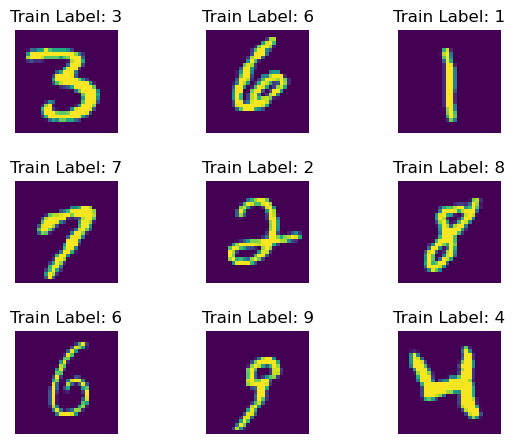

In [4]:
#Image preview
figures = plt.figure()
for i in range (9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[12+i])
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Train Label: {y_train[12+i]}")
plt.tight_layout(pad=2)
plt.savefig("images/SamplePreview.png", bbox_inches="tight")
plt.show()

## Data Flattening and Normalization

In [5]:
#Unrolling and normalizing image data
X_train_flattened = X_train.reshape(len(X_train),28*28) / 255
X_test_flattened = X_test.reshape(len(X_test),28*28) / 255

In [6]:
#Size check
print(f"Flattened Train Set shape: {X_train_flattened.shape}\nFlattened Test Set size: {X_test_flattened.shape}")

Flattened Train Set shape: (60000, 784)
Flattened Test Set size: (10000, 784)


## Basic Model

In [7]:
#Building Basic NN model
model = Sequential([
    Dense(units=10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8165 - loss: 0.7176
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9132 - loss: 0.3118
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9217 - loss: 0.2812
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9239 - loss: 0.2756
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9263 - loss: 0.2633


In [8]:
y_preds = model.predict(X_test_flattened)
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.9153 - loss: 0.3046


[0.2685769200325012, 0.9258999824523926]

In [9]:
#Storing predictions into array using argmax
y_preds = np.array([np.argmax(i) for i in y_preds])

In [10]:
y_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

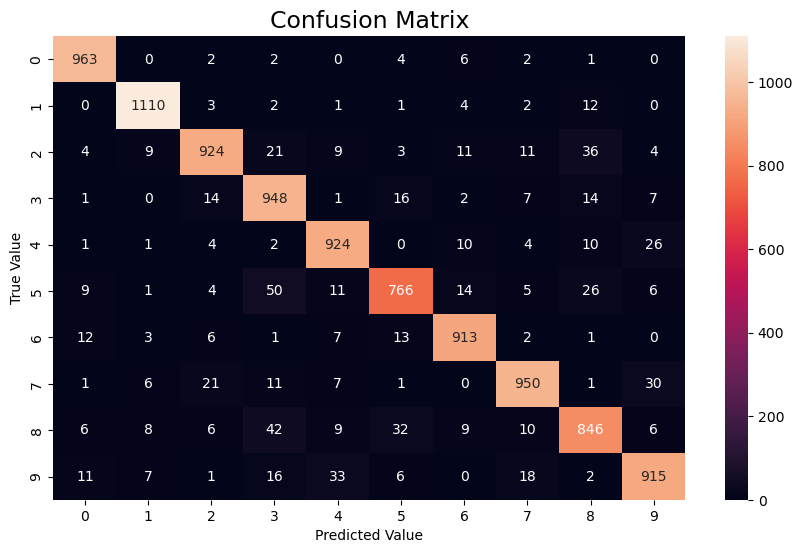

In [11]:
#Confusion Matrix for error analysis
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix", fontsize=17)
plt.tight_layout(pad=6)
plt.savefig("images/Conf_Matrix.png", bbox_inches="tight")
plt.show()

In [12]:
#Checking the fraction of missclassifications for each digit
miss_class_list = []
#cm = cm.numpy()
for i in range(10):
    cols_before_sum = np.sum(cm[i,0:i])
    cols_after_sum = np.sum(cm[i,i:])
    miss_class_list.append( (cols_before_sum + cols_after_sum) / cm[i,i] )


In [13]:
miss_class_list = (np.array(miss_class_list) - 1) * 100
miss_class_list

array([ 1.76531672,  2.25225225, 11.68831169,  6.54008439,  6.27705628,
       16.44908616,  4.92880613,  8.21052632, 15.13002364, 10.27322404])

We see that our NN makes the most mistakes on the digits:
- `2` (13% missclassified)
- `8` (12% missclassified)
- `3` (13% missclassified),

respectively.

## Advanced Model

In [14]:
#Building More Advanced NN model
#print('---------------------------------------------------------\nTRAIN SET:\n---------------------------------------------------------')
model2 = Sequential([
    Flatten(input_shape=(28,28)), #using Flatten layear instead of manually flattening data
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\jom4n\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#Configuring Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Storing history for later plotting
history = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0775 - val_accuracy: 0.9668 - val_loss: 0.1714
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0659 - val_accuracy: 0.9687 - val_loss: 0.1503
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9832 - loss: 0.0652 - val_accuracy: 0.9677 - val_loss: 0.1586
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0653 - val_accuracy: 0.9669 - val_loss: 0.1862
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0639 - val_accuracy: 0.9667 - val_loss: 0.1832
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9843 - loss: 0.0595 - val_accuracy: 0.9664 - val_loss: 0.2009
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9834 - loss: 0.0632 - val_accuracy: 0.9701 - val_loss: 0.1844
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0535 - 

In [17]:
#Saving history into a file
with open("files/history_log_1.txt", "wb") as f:
    pickle.dump(history.history, f)

In [18]:
#Convert into dataframe for loss-epoch plots
history = pd.DataFrame(history.history)

<Figure size 1000x700 with 0 Axes>

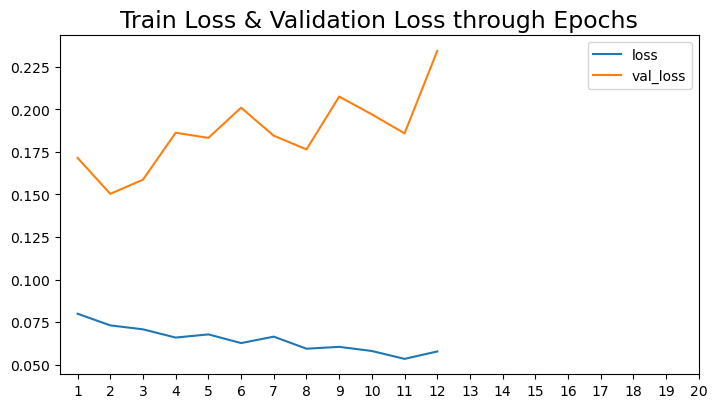

In [19]:
fig = plt.figure(figsize=(10,7))
(history[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,20)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks])
plt.savefig("images/Los_Val_Loss.png", bbox_inches="tight")
plt.show()

We can see that after approximately the 5th epoch, the validation loss is (non-monotonically) rising, while the training loss is falling. This is a textbook case of overfitting. Therefore, for this particular model architecture, we will go with 5 epochs; in fact, the EarlyStopping callback has already saved the best performing weights for us.

In [20]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds = model2.predict(X_test, verbose=True)
model2.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9642 - loss: 0.1645


[0.1503002792596817, 0.9686999917030334]

## CNN Model

We attempt the same classification using a simple Convolutional Neural Network Model implemented through Keras' Functional API. For this particular model, the same could be accomplished by using a Sequential Model, but it is a good exercise to use the Funtional API.

The CNN architecture will be as follows:
- Input Layer ($28 \times 28 \times 1$ grayscale image),
- Conv2D Layer (8 filters of size $4\times4$, stride of 1, `'same'` padding), 
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $8\times8$, stride of 8, `'same'` padding),
- Conv2D Layer (16 filters of size $2\times2$, stride of 1, `'same'` padding),
- ReLU Layer,
- MaxPool2D Layer (kernel shape of $4\times4$, stride of 4, `'same'` padding),
- Flatten Layer,
- Dense Layer as output (10 units, `softmax` activation).

In [33]:
#Constructing CNN using Functional API
input_img = tf.keras.Input(shape=(28,28,1))

Z1 = Conv2D(filters=8, kernel_size=(4,4), strides=1, padding='same')(input_img)
A1 = ReLU()(Z1)
P1 = MaxPool2D(pool_size=(8,8), strides=8, padding='same')(A1)
#Z2 = Conv2D(filters=16, kernel_size=(2,2), strides=1, padding='same')(P1)
#A2 = ReLU()(Z2)
#P2 = MaxPool2D(pool_size=(4,4), strides=4, padding='same')(A2)
F = Flatten()(P1)

outputs = Dense(units=10, activation='softmax')(F)

model_cnn = tf.keras.Model(inputs=input_img, outputs=outputs)

In [34]:
#Checking model summary
model_cnn.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 8)      │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 28, 28, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426 (5.57 KB)

 Trainable params: 1,426 (5.57 KB)

 Non-trainable params: 0 (0.00 B)

It needs to be kept in mind that our output data (`y_train`) contains the integer of the digit that is associated with an image; `y_train` is **not** one-hot encoded! For this reason, we use the 'sparse' version of the `'categorical_crossentropy'` loss function. As a reminder, sparse functions use the target data (ground truth) as **integer labels**: 0, 1, 2, 3, 4, etc., while non-sparse functions use the target data as **one-hot labels**: [1,0,0], [0,1,0], [0,0,1], or similar.

In [35]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history_cnn = model_cnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5891 - loss: 13.4855 - val_accuracy: 0.8744 - val_loss: 0.7030
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8811 - loss: 0.6147 - val_accuracy: 0.9120 - val_loss: 0.3241
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9198 - loss: 0.2945 - val_accuracy: 0.9335 - val_loss: 0.2161
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9360 - loss: 0.2110 - val_accuracy: 0.9378 - val_loss: 0.1940
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9468 - loss: 0.1764 - val_accuracy: 0.9412 - val_loss: 0.1899
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9505 - loss: 0.1629 - val_accuracy: 0.9465 - val_loss: 0.1709
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9560 - loss: 0.1468 - val_accuracy: 0.9603 - val_loss: 0.1189
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9579 - loss: 

In [36]:
#Saving history into a file
with open("files/history_log_CNN.txt", "wb") as f:
    pickle.dump(history_cnn.history, f)

#Convert into dataframe for loss-epoch plots
history_cnn = pd.DataFrame(history_cnn.history)

<Figure size 1000x700 with 0 Axes>

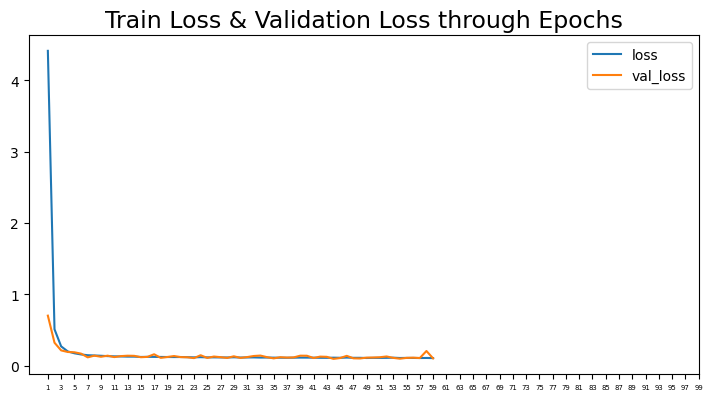

In [37]:
#Plotting loss through different epochs
fig = plt.figure(figsize=(10,7))
(history_cnn[['loss', 'val_loss']]).plot(figsize=(8,5))
plt.title("Train Loss & Validation Loss through Epochs", fontsize=17)
plt.tight_layout(pad=4)
ticks = np.arange(0,100,2)
plt.xticks(ticks=ticks, labels=[i+1 for i in ticks], fontsize=5)
plt.savefig("images/Loss_Val_Loss_CNN.png", bbox_inches="tight")
plt.show()

In [38]:
print('---------------------------------------------------------\nTEST SET:\n---------------------------------------------------------')
y_preds_cnn = model_cnn.predict(X_test, verbose=True)
model_cnn.evaluate(X_test, y_test)

---------------------------------------------------------
TEST SET:
---------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9660 - loss: 0.1054


[0.0975249633193016, 0.9693999886512756]

In [32]:
#Need to improve it
#patience: 15 -> 0.969399988651275 TEST SET

# Conclusions

We have successfully tackled the MNIST Digit Dataset in three different ways using Deep Learning. We have built three Neural Networks:
- a Basic and shallow model that gives 0.926 accuracy on the test set,
- a More Advanced and deeper model that gives 0.969 accuracy on the test set,
- a Convolutional Model that gives 0.969 accuracy on the test set.

The results are satisfactory.